## Summary

Dans cet exercice, vous êtes Data Scientist dans une **start-up de la EdTech**, nommée **academy**, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.

 

**Boubacar**, votre manager, vous a convié à une réunion pour vous présenter le **projet d’expansion à l’international** de l’entreprise. Il vous confie une **première mission d’analyse exploratoire**, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’enrichir la réflexion autour du projet d’expansion

 

**Boubacar** aimerait explorer les pays avec un fort potentiel de clients pour les services de **academy**, et voir comment ce potentiel pourrait évoluer. 

 

Vous allez répondre à la demande de **Boubacar** en suivant l’ensemble des exercices entièrement guidés. A la fin des exercices, vous aurez réussi à déterminer si ces jeux de données peuvent fournir des insights guidant academy à décider **dans quels pays s’implanter**. 


## Import Libraries

pip install folium

In [1]:
from pathlib import Path

import folium
from loguru import logger
import pandas as pd
import pendulum
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

pd.set_option("display.max_columns", None)  #By default, display all columns in dataframe

In [28]:
# Return a new path pointing to the current working directory
HOME_DIR = Path.cwd().parent

# create a variable for data directory
DATA_DIR = Path(HOME_DIR, "data")
DATA_DIR.mkdir(parents=True, exist_ok=True)

REPORT_DIR = Path(HOME_DIR, "reports")
REPORT_DIR.mkdir(parents=True, exist_ok=True)

logger.info(f"\nWork directory: {HOME_DIR} \nData directory: {DATA_DIR}")

2025-09-28 23:36:28.637 | INFO     | __main__:<module>:11 - 
Work directory: /Users/mouslydiaw/Documents/SenIA/handson-machine-learning/tp1_education_analysis 
Data directory: /Users/mouslydiaw/Documents/SenIA/handson-machine-learning/tp1_education_analysis/data


## Data collection

In [3]:
data = pd.read_csv(Path(DATA_DIR, "Edstatsdata.csv"))
logger.info(f"Data shape: {data.shape}")

2025-09-28 23:33:53.105 | INFO     | __main__:<module>:2 - Data shape: (886930, 70)


In [4]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns = (
    data.columns
    .str.strip()              # supprime les espaces début/fin
    .str.replace(" ", "_")    # remplace espaces par _
    .str.lower()              # met tout en minuscules
)


In [6]:
data.columns

Index(['country_name', 'country_code', 'indicator_name', 'indicator_code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'unnamed:_69'],
      dtype='object')

## Missing data

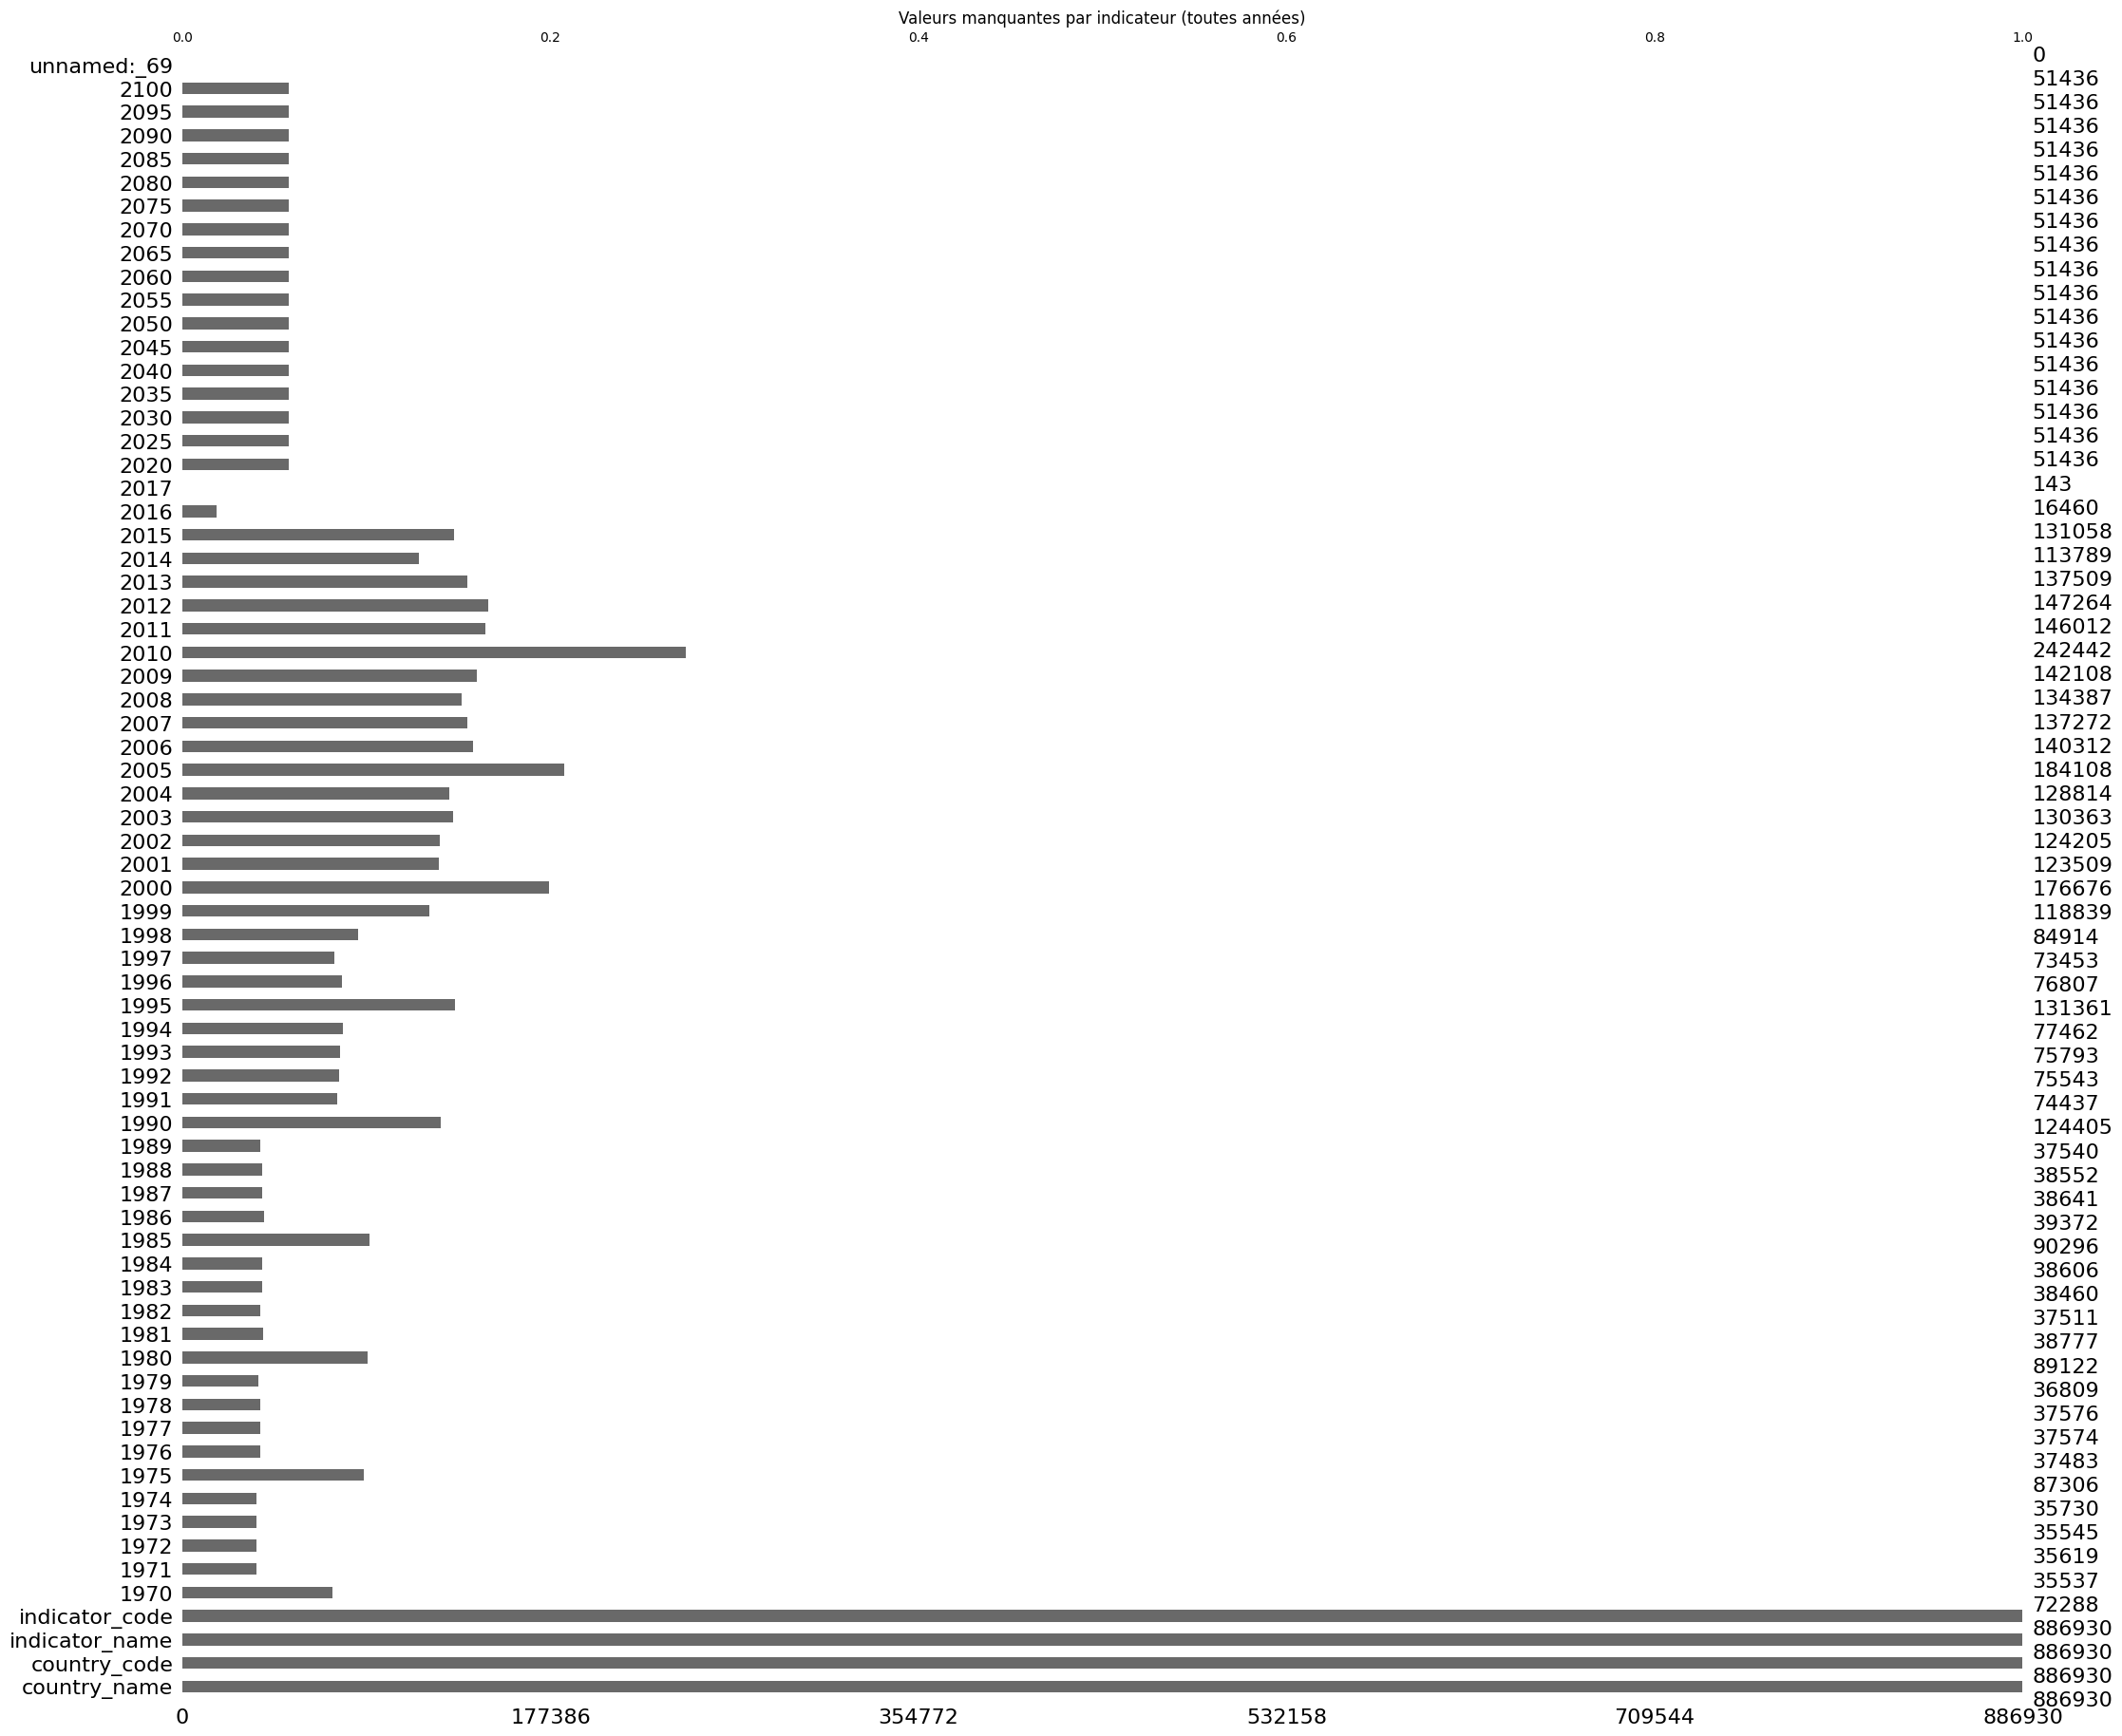

In [7]:
plt.figure(figsize=(10, 6))
msno.bar(data)
plt.title("Valeurs manquantes par indicateur (toutes années)")
plt.show()

## Data cleaning

In [8]:
data.head()

,country_name,country_code,indicator_name,indicator_code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,unnamed:_69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.columns

Index(['country_name', 'country_code', 'indicator_name', 'indicator_code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'unnamed:_69'],
      dtype='object')

In [10]:
# Select yearsto analyze
year_cols = [str(yr) for yr in range(2010, 2016)]

# Delete rows where all values are nulls
data = data.dropna(subset=year_cols, how="all")

# Select specific columns
data = data[["indicator_name", "indicator_code",
             "country_name", "country_code"] + year_cols]

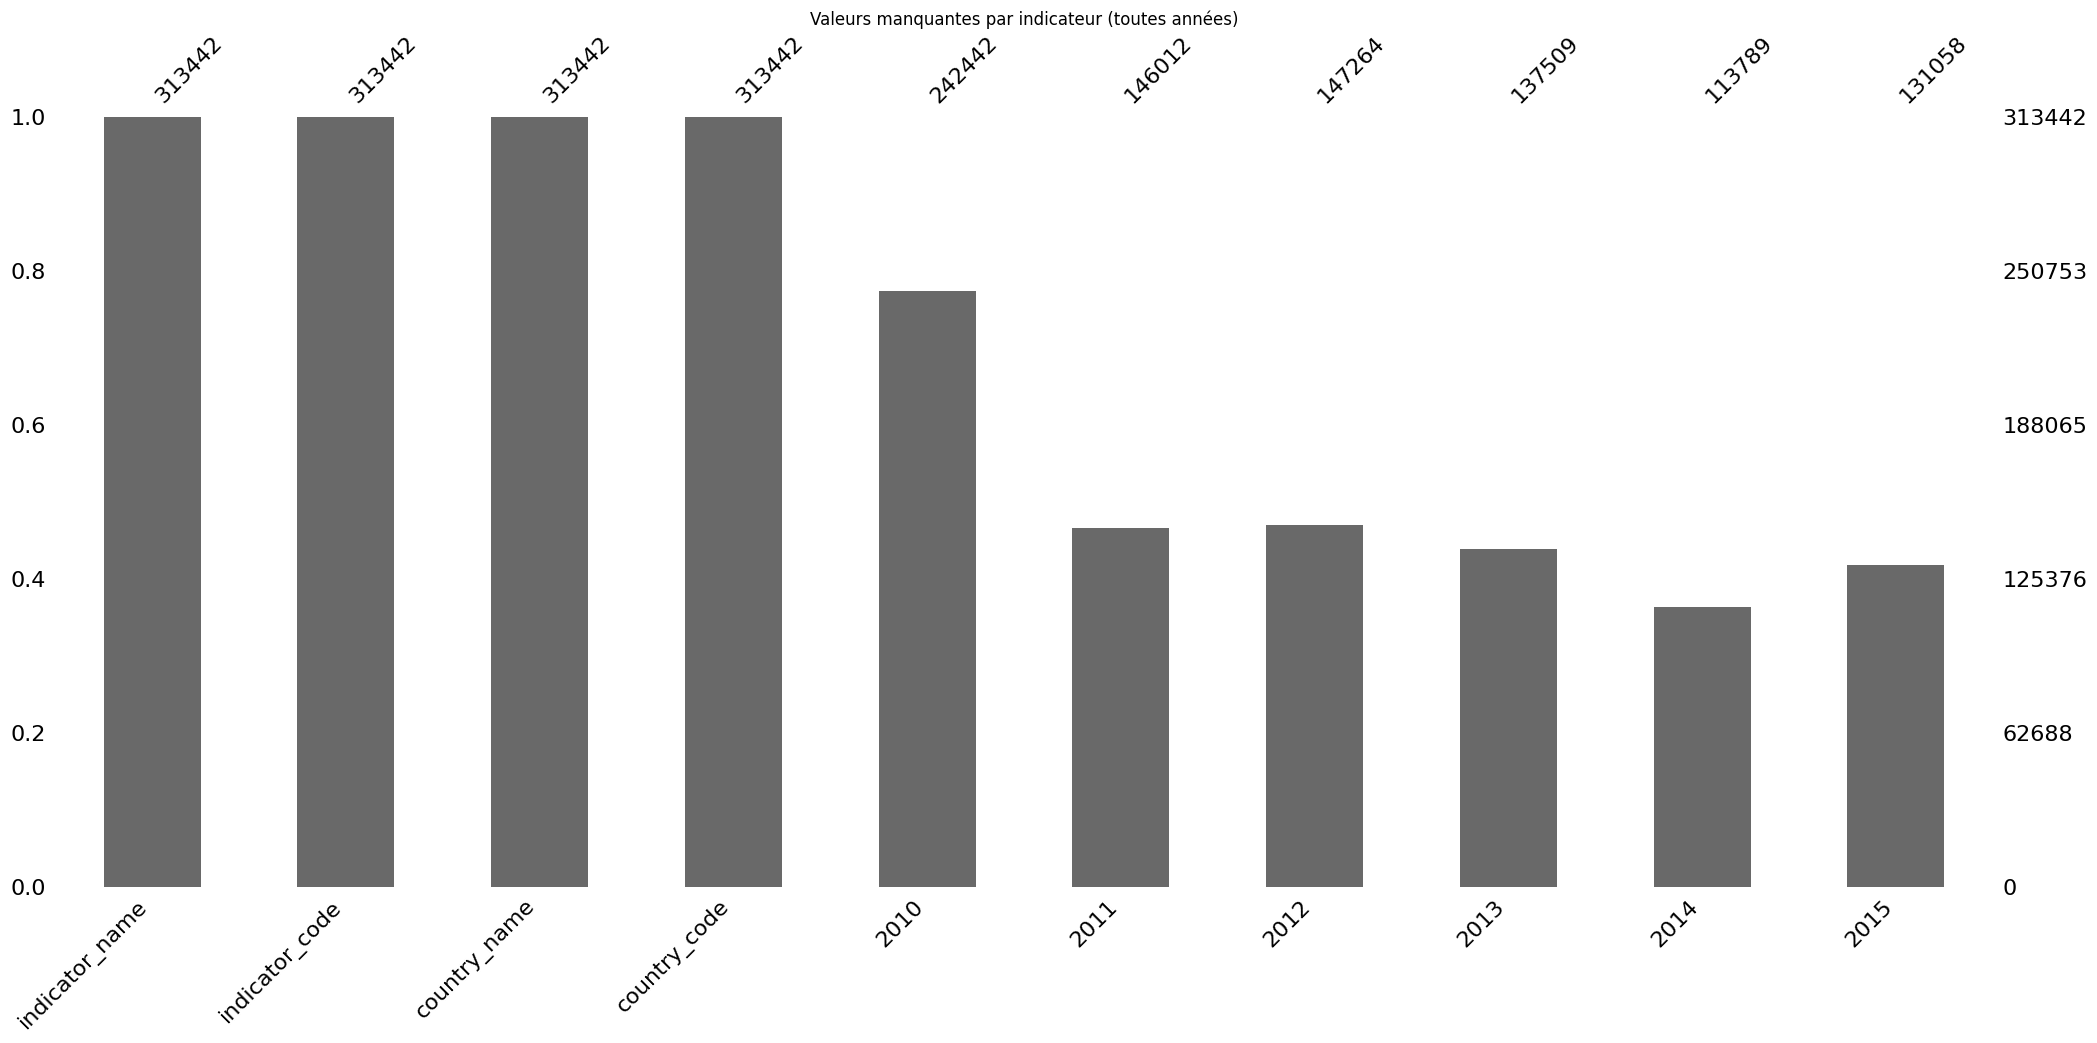

In [11]:
plt.figure(figsize=(10, 6))
msno.bar(data)
plt.title("Valeurs manquantes par indicateur (toutes années)")
plt.show()

## EDA : Analysis exploratory

In [12]:
data.describe(include="all")

,indicator_name,indicator_code,country_name,country_code,2010,2011,2012,2013,2014,2015
count,313442,313442,313442,313442,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05
unique,3427,3427,242,242,NaN,NaN,NaN,NaN,NaN,NaN
top,"Population, total",SP.POP.TOTL,Ghana,GHA,NaN,NaN,NaN,NaN,NaN,NaN
freq,240,240,2300,2300,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10
std,NaN,NaN,NaN,NaN,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11
min,NaN,NaN,NaN,NaN,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00
25%,NaN,NaN,NaN,NaN,1.322703e+00,1.216330e+01,1.100000e+01,1.306113e+01,1.614639e+01,4.100000e-01
50%,NaN,NaN,NaN,NaN,2.046020e+01,9.853510e+01,9.759012e+01,1.000000e+02,1.000000e+02,5.235000e+01
75%,NaN,NaN,NaN,NaN,3.121000e+03,1.065065e+05,1.038168e+05,1.426480e+05,1.636440e+05,6.153575e+04


### Indicators selection

1. **Économie (mesurer la capacité de paiement & stabilité)**

- PIB par habitant (USD courants) → NY.GDP.PCAP.CD
- Croissance annuelle du PIB (%) → NY.GDP.MKTP.KD.ZG
- (optionnel) Inflation, prix à la consommation (%) → FP.CPI.TOTL.ZG

2. **Éducation & capital humain** 

- Dépenses en éducation (% du PIB) → SE.XPD.TOTL.GD.ZS
- Taux brut d’inscription secondaire (%) → SE.SEC.ENRR
- Taux brut d’inscription supérieur (%) → SE.TER.ENRR
- (optionnel) Indice de capital humain → HD.HCI.OVRL

3. **Numérique & innovation (accès aux solutions en ligne)**

- Utilisateurs d’Internet (% population) → IT.NET.USER.ZS
- Abonnements mobile (pour 100 habitants) → IT.CEL.SETS.P2
- Abonnements haut débit fixe (pour 100 habitants) → IT.NET.BBND.P2

4. **Démographie (taille et structure du marché)**

-  Population totale → SP.POP.TOTL
- Jeunes 15–24 ans (% population) → SP.POP.1524.TO.ZS
- Croissance démographique annuelle (%) → SP.POP.GROW

# To do :

- Selectionner les indicateurs les plus pertinents pour l'analyse par dimension :
    - Économie (ex: PIB par habitant, croissance PIB)
    - Éducation (ex: taux de scolarisation, dépenses en éducation)
    - Numérique (ex: % utilisateurs internet, abonnements mobiles)
    - Démographie (ex: population totale, % jeunes)
- Faire une analyse de l'évolution de ces différents indicateurs dans le temps
- Montrer les pays top / flop

### Indicators selection

In [13]:
# Fillna with last no-empty value
data["indicator_last_value"] = data[year_cols].ffill(axis=1).iloc[:, -1]

In [14]:
# Search relevant indicator by key
data.loc[data.indicator_code.str.contains("GDP.MKTP", na=False), ["indicator_name", "indicator_code"]].drop_duplicates()

,indicator_name,indicator_code
1242,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD
1243,GDP at market prices (current US$),NY.GDP.MKTP.CD
1248,"GDP, PPP (constant 2011 international $)",NY.GDP.MKTP.PP.KD
1249,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD


In [15]:
# to be completed if needed
selected_indicators = {
    "NY.GDP.PCAP.CD": "gdp_per_capita",
    "SE.XPD.TOTL.GD.ZS": "edu_spending_pct_gdp",
    "SE.SEC.ENRR": "secondary_enrollment",
    "IT.NET.USER.ZS": "internet_users_pct",
    "SP.POP.TOTL": "population_total",
    "SP.POP.1524.TO.UN": "population_1524"
}
data_selected = data.loc[lambda dfr: dfr.indicator_code.isin(selected_indicators)]
data_selected.shape

(1010, 11)

In [16]:
data_selected.head()

,indicator_name,indicator_code,country_name,country_code,2010,2011,2012,2013,2014,2015,indicator_last_value
1245,GDP per capita (current US$),NY.GDP.PCAP.CD,Arab World,ARB,6.032962e+03,7.005480e+03,7.571402e+03,7.715999e+03,NaN,NaN,7.715999e+03
1335,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,Arab World,ARB,6.805088e+01,7.069149e+01,7.171656e+01,7.027469e+01,70.735046,NaN,7.073505e+01
2533,"Population, total",SP.POP.TOTL,Arab World,ARB,3.477370e+08,3.551370e+08,3.624666e+08,3.697615e+08,NaN,NaN,3.697615e+08
4910,GDP per capita (current US$),NY.GDP.PCAP.CD,East Asia & Pacific,EAS,7.679834e+03,8.844823e+03,9.402723e+03,9.447701e+03,9665.056079,9541.871089,9.541871e+03
5000,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,East Asia & Pacific,EAS,8.150263e+01,8.432813e+01,8.633956e+01,8.886735e+01,87.934822,NaN,8.793482e+01


### Pivot table

Définissez ce que représente une ligne. 
une ligne = un pays ? Une colonne = un indicateur ?

In [17]:
df_pivot = data_selected.pivot_table(
    index=["country_name", "country_code"],
    columns="indicator_code", values="indicator_last_value"
)
df_pivot.head()

,indicator_code,NY.GDP.PCAP.CD,SE.SEC.ENRR,SE.XPD.TOTL.GD.ZS,SP.POP.1524.TO.UN,SP.POP.TOTL
country_name,country_code,,,,,
Afghanistan,AFG,569.577923,55.644409,3.31754,7252785.0,33736494.0
Albania,ALB,3934.895394,95.765488,3.53944,556269.0,2880703.0
Algeria,DZA,4160.220067,99.860191,NaN,6467818.0,39871528.0
American Samoa,ASM,11865.963232,NaN,NaN,NaN,55537.0
Andorra,AND,36038.267604,NaN,3.25368,NaN,78014.0


In [18]:
df_pivot = df_pivot.reset_index(drop=False)

In [19]:
df_pivot.columns.name = None

In [20]:
df_pivot.head()

,country_name,country_code,NY.GDP.PCAP.CD,SE.SEC.ENRR,SE.XPD.TOTL.GD.ZS,SP.POP.1524.TO.UN,SP.POP.TOTL
0,Afghanistan,AFG,569.577923,55.644409,3.31754,7252785.0,33736494.0
1,Albania,ALB,3934.895394,95.765488,3.53944,556269.0,2880703.0
2,Algeria,DZA,4160.220067,99.860191,NaN,6467818.0,39871528.0
3,American Samoa,ASM,11865.963232,NaN,NaN,NaN,55537.0
4,Andorra,AND,36038.267604,NaN,3.25368,NaN,78014.0


In [ ]:
# Renommer les colonnes
df_pivot = df_pivot.rename(...)
df_pivot.head()

### Data profiling

pip install ydata-profiling==4.17.0

In [25]:
df_pivot = df_pivot.rename(columns=selected_indicators)

In [26]:
from ydata_profiling import ProfileReport

In [32]:
profile = ProfileReport(df_pivot, title="Profiling Report")

# HTML report can be directly embedded in a cell in a similar fashion
# profile.to_notebook_iframe()

# To generate a HTML report file
profile.to_file(Path(REPORT_DIR, "education_profil.html"))

Export report to file: 100%|████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 213.44it/s]


## Ranking

### Filtering

In [33]:
df_pivot.describe(include="all")

,country_name,country_code,gdp_per_capita,secondary_enrollment,edu_spending_pct_gdp,population_1524,population_total
count,242,242,229.000000,203.000000,157.000000,1.810000e+02,2.400000e+02
unique,242,242,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,15516.558261,83.288059,4.686400,6.654995e+06,2.070249e+08
std,NaN,NaN,23510.692826,28.044819,1.930793,2.404044e+07,8.025361e+08
min,NaN,NaN,300.676557,9.517560,1.021950,1.445500e+04,1.100100e+04
25%,NaN,NaN,1922.041388,64.158978,3.262120,4.897540e+05,1.302206e+06
50%,NaN,NaN,6030.343259,89.167236,4.612500,1.331040e+06,8.590910e+06
75%,NaN,NaN,17321.787616,101.479790,5.549870,4.945440e+06,3.815176e+07


#### Population

In [41]:
df_pivot.loc[lambda dfr : dfr.country_name.isin(["China", "India"]), "population_total"].max()

np.float64(1371220000.0)

In [43]:
df_pivot.loc[df_pivot.population_total <= df_pivot.loc[lambda dfr : dfr.country_name.isin(["China", "India"]), 
    "population_total"].max(), "country_name"
    ].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Euro area',
       'Europe & Central As

In [84]:
# Calcul du 1er quartile (Q1) de la population totale
population_q1 = df_pivot["population_total"].quantile(0.25)

logger.info(f"Seuil Q1 (Population totale) : {population_q1}")

population_filter = df_pivot.population_total >= population_q1

# Countries to be deleted
df_pivot.loc[~population_filter, "country_name"].unique()

2025-09-28 23:25:04.542 | INFO     | __main__:<module>:4 - Seuil Q1 (Population totale) : 1302206.5


array(['American Samoa', 'Andorra', 'Antigua and Barbuda', 'Aruba',
       'Bahamas, The', 'Barbados', 'Belize', 'Bermuda', 'Bhutan',
       'British Virgin Islands', 'Brunei Darussalam', 'Cabo Verde',
       'Cayman Islands', 'Channel Islands', 'Comoros', 'Curacao',
       'Cyprus', 'Djibouti', 'Dominica', 'Equatorial Guinea',
       'Faroe Islands', 'Fiji', 'French Polynesia', 'Gibraltar',
       'Greenland', 'Grenada', 'Guam', 'Guyana', 'Iceland', 'Isle of Man',
       'Kiribati', 'Liechtenstein', 'Luxembourg', 'Macao SAR, China',
       'Maldives', 'Malta', 'Marshall Islands', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Monaco', 'Montenegro', 'Nauru',
       'New Caledonia', 'Northern Mariana Islands', 'Palau', 'Samoa',
       'San Marino', 'Sao Tome and Principe', 'Seychelles',
       'Sint Maarten (Dutch part)', 'Solomon Islands',
       'St. Kitts and Nevis', 'St. Lucia', 'St. Martin (French part)',
       'St. Vincent and the Grenadines', 'Suriname', 'Timor-Leste',
       'To

In [87]:
# Filter smallest countries
df_pivot = df_pivot.loc[population_filter]
df_pivot.shape

(180, 7)

In [45]:
# Population maximal entre

df_biggest_country = df_pivot.loc[df_pivot["country_name"].isin(["China", "India"]), ["country_name", "population_total"]]

# Trouver la ligne du max
max_population = df_biggest_country.loc[df_biggest_country["population_total"].idxmax()]

real_max_population = max_population["population_total"]
logger.info(f"Pays : {max_population['country_name']}")
logger.info(f"Population maximale : {real_max_population}")

# Vérifier s'il y a des pays plus peuplés que la Chine et l'Inde
# Lister les pays qui ont plus d'habitants que ces 2 pays
# Supprimer les dans le dataset


2025-09-28 23:46:25.028 | INFO     | __main__:<module>:9 - Pays : China
2025-09-28 23:46:25.167 | INFO     | __main__:<module>:10 - Population maximale : 1371220000.0


In [86]:
df_pivot.head()

,country_name,country_code,gdp_per_capita,secondary_enrollment,edu_spending_pct_gdp,population_1524,population_total
0,Afghanistan,AFG,569.577923,55.644409,3.31754,7252785.0,33736494.0
1,Albania,ALB,3934.895394,95.765488,3.53944,556269.0,2880703.0
2,Algeria,DZA,4160.220067,99.860191,NaN,6467818.0,39871528.0
5,Angola,AGO,3695.793748,28.898720,3.47623,4259352.0,27859305.0
7,Arab World,ARB,7715.998677,70.735046,NaN,NaN,369761523.0


### Population 15 to 24 years

In [ ]:
To do : Delete irrelevant countries based on this inidcator

### Internet users

In [ ]:
To do : Delete irrelevant countries based on this inidcator

### GDP per capita

In [ ]:
To do : Delete irrelevant countries based on this inidcator

## Scoring

In [ ]:
# If you have many countries, you can calculate a score to rank them